In [4]:
import IPython
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

%matplotlib inline

In [5]:
def displayAudioMenu(audioPath):
    IPython.display.display(IPython.display.Audio(audioPath))

In [6]:
arrayAudios = ["data/eight/0a2b400e_nohash_4.wav","data/six/0a2b400e_nohash_0.wav","data/seven/0a0b46ae_nohash_0.wav","data/on/0a2b400e_nohash_0.wav","data/yes/0a2b400e_nohash_0.wav","data/happy/0a2b400e_nohash_0.wav","data/right/0e17f595_nohash_1.wav","data/house/0e8ec1cb_nohash_0.wav","data/down/0a2b400e_nohash_0.wav"]
arrayTitles = ["eight","six","seven","on","yes","happy","right","house","down"]

In [7]:
def readAudios(arrayAudios = ["data/eight/0a2b400e_nohash_4.wav","data/six/0a2b400e_nohash_0.wav","data/seven/0a0b46ae_nohash_0.wav","data/on/0a2b400e_nohash_0.wav","data/yes/0a2b400e_nohash_0.wav","data/happy/0a2b400e_nohash_0.wav","data/right/0e17f595_nohash_1.wav","data/house/0e8ec1cb_nohash_0.wav","data/down/0a2b400e_nohash_0.wav"],arrayTitles = ["eight","six","seven","on","yes","happy","right","house","down"],loadingAudio=True):
    arraySampleRate = []
    arrayData = []    
    for url in arrayAudios:
        if loadingAudio:
            print(url)
            displayAudioMenu(url)
        samplerate, data = wavfile.read(url)
        arraySampleRate.append(samplerate)
        arrayData.append(data)
    return arraySampleRate,arrayData

In [8]:
arraySampleRate,arrayData = readAudios()

data/eight/0a2b400e_nohash_4.wav


data/six/0a2b400e_nohash_0.wav


data/seven/0a0b46ae_nohash_0.wav


data/on/0a2b400e_nohash_0.wav


data/yes/0a2b400e_nohash_0.wav


data/happy/0a2b400e_nohash_0.wav


data/right/0e17f595_nohash_1.wav


data/house/0e8ec1cb_nohash_0.wav


data/down/0a2b400e_nohash_0.wav























































# Forma de ondas por palabras

In [9]:
def plotAudios(arrayData,arrayTitles,rows,columns):
    fig = plt.figure(figsize=(16,20))
    for i, audio in enumerate(arrayData):
        plt.subplot(rows,columns,i+1)
        plt.title(arrayTitles[i])
        plt.axis('off')
        plt.plot(audio)

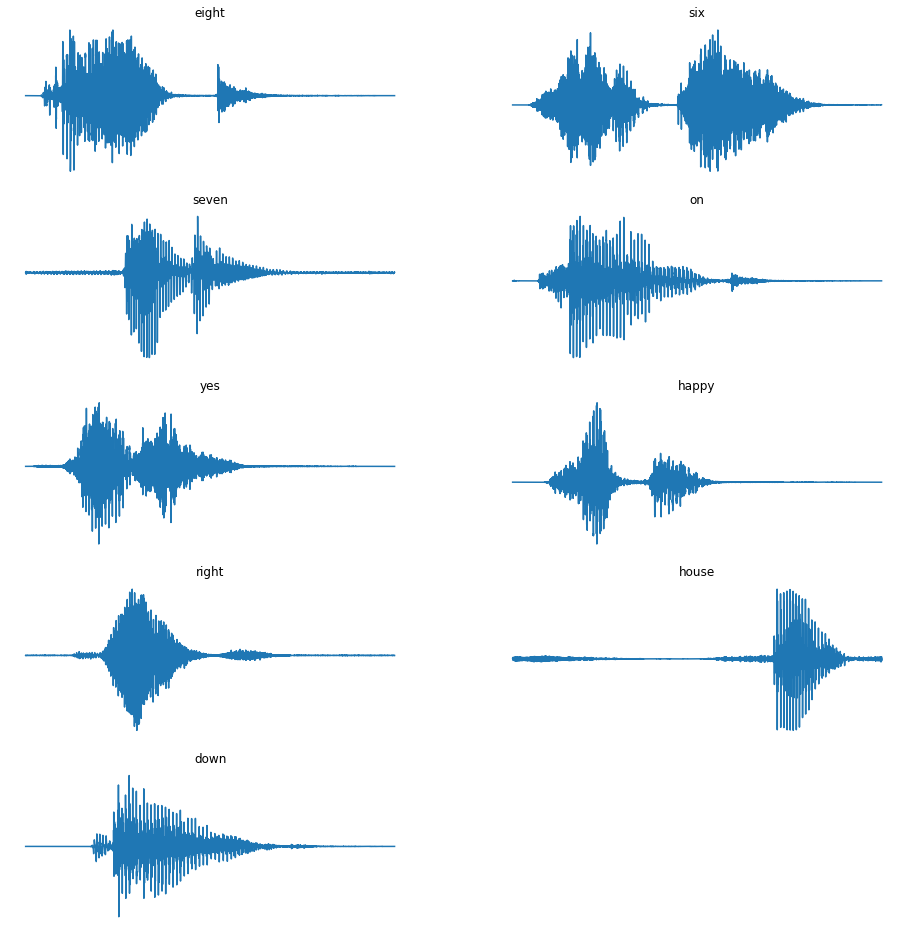

In [10]:
plotAudios(arrayData,arrayTitles,6,2)

# Forma de onda misma palabra varios hablantes

data/five/0ab3b47d_nohash_2.wav


data/five/0b7ee1a0_nohash_0.wav


data/five/0ba018fc_nohash_2.wav


data/five/0ea0e2f4_nohash_0.wav


data/five/1a892463_nohash_2.wav


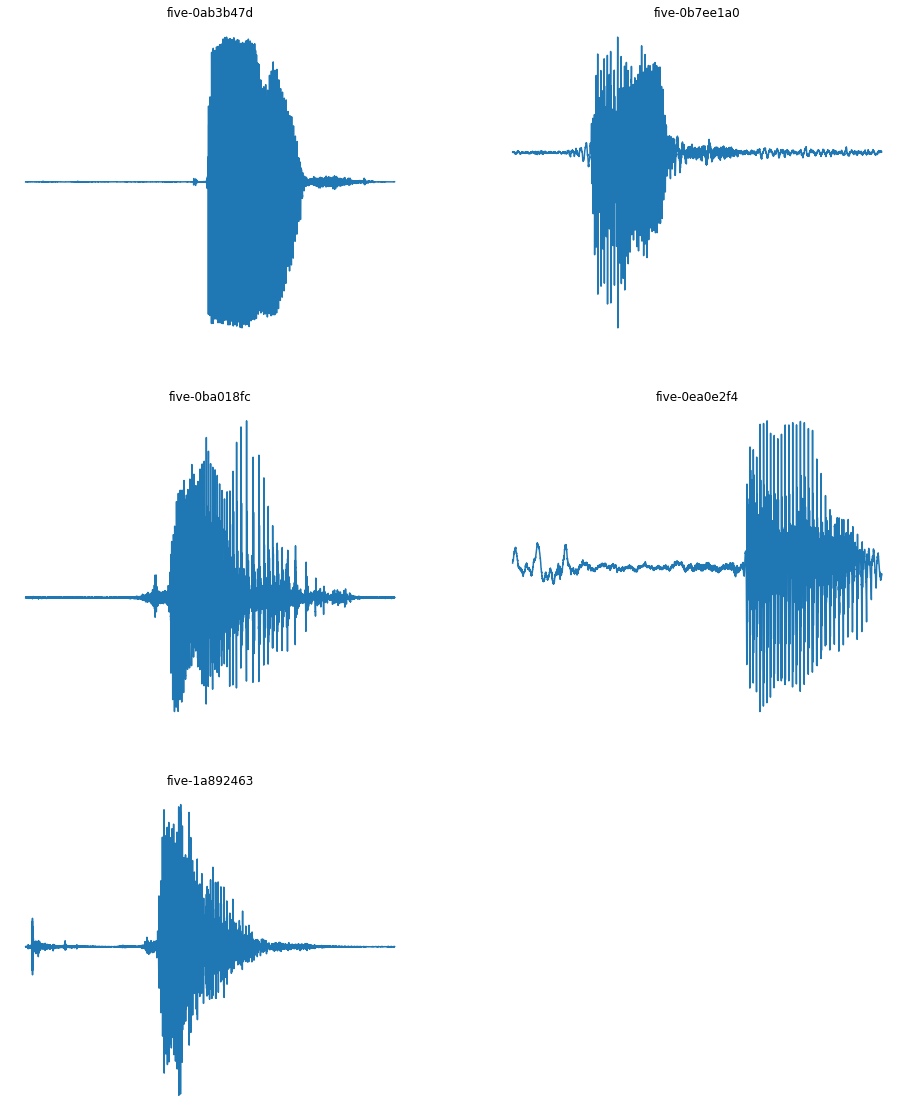

In [11]:
AudiosManySpeakers = ["data/five/0ab3b47d_nohash_2.wav","data/five/0b7ee1a0_nohash_0.wav","data/five/0ba018fc_nohash_2.wav","data/five/0ea0e2f4_nohash_0.wav","data/five/1a892463_nohash_2.wav"]
TitlesManySpeakers = ["five-0ab3b47d","five-0b7ee1a0","five-0ba018fc","five-0ea0e2f4","five-1a892463"]
SampleRate,arrayData=readAudios(AudiosManySpeakers,TitlesManySpeakers)
plotAudios(arrayData,TitlesManySpeakers,3,2)

In [13]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    #t Array of segment times.
    freqs,t, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [14]:
arraySampleRate,arrayData = readAudios(loadingAudio=False)

def showSpectograms(arraySampleRate,arrayData,arrayTitles):
    i = 0
    for data,sampleRate in zip(arrayData,arraySampleRate):
        freqs,spectrogram = log_specgram(data,sampleRate)
        plt.subplot(3,3,i+1)
        plt.title(arrayTitles[i])
        plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.axis('off')
        i = i+1    

# Espectogramas de diferentes palabras

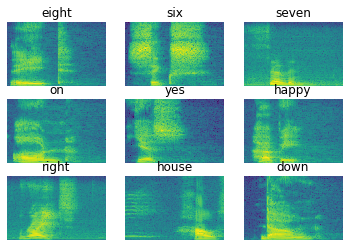

In [15]:
showSpectograms(arraySampleRate,arrayData,arrayTitles)

# Espectograma misma palabra diferentes hablantes

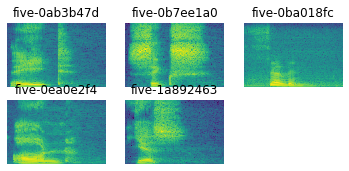

In [16]:
showSpectograms(SampleRate,arrayData,TitlesManySpeakers)

# Dividir Espectograma y sacar información de interés

In [17]:
pathFive="data/five/1a892463_nohash_2.wav"
displayAudioMenu(pathFive)
samplerate, dataAudio = wavfile.read(pathFive)
#spectogram 
freqs, spectogram = log_specgram(dataAudio,samplerate)

print("audio", samplerate, dataAudio.shape)
print("spectograma", spectogram.shape)

Spectogram = spectogram[:,0:-1]

blocks =[]
nBlocks = round(np.size(Spectogram,1)/10)
initial = 0
final = nBlocks #16
for i in range(10):
    blocks.append(Spectogram[:,initial:final])
    initial = initial + nBlocks
    final = final+nBlocks
npBlocks = np.array(blocks)
initial = 0
nBlocks= 9
final = nBlocks #16
mean = []
std = []
for j in range(10):
    initial = 0
    nBlocks= 9
    for k in range(11):
        block =npBlocks[j,initial:final,:]
        mean.append(np.mean(block))
        std.append(np.std(block))    
        initial = initial + nBlocks
        final = final+nBlocks

Mean = np.array(mean)
Std  = np.array(std)
Mean.shape

audio 16000 (16000,)
spectograma (99, 161)


(110,)

In [18]:
import pandas as pd
df = pd.DataFrame({'Mean': Mean, 'Std': Std})
df.shape

(110, 2)